# Experiments with dynamic scaling and CNNs

_23 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

Continuation of work in `dynamic-cnns.ipynb`.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

# Fashion-MNIST

## At noise levels $\sigma_\mathrm{n}^2 = 10^{-12}, 10^{-6}, 10^{-3}$

I think I will keep the $10^{-6}$ and ditch the other two.

In [2]:
def get_comparison_specs(noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('expect', 64),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title',  1.0),
        'dataset':                ('title',  'fashionmnist-cnn2'),
        'momentum_client':        ('expect', 0.0),
        'weight_decay_client':    ('expect', 0.0),
        'optimizer_client':       ('expect', 'sgd'),
        'clients':                ('title',  20),
        'noise':                  ('series', noise),
        'lr_client':              ('series', '__all__'),
        'lr_scheduler_client':    ('series', '__all__'),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

def _plot_comparisons(field, paths, all_specs, zoom_ylim=None, axsize=(11, 7), **kwargs):
    axs = make_axes(2 if zoom_ylim else 1, axsize=axsize)
    kwargs.setdefault('extra_lines', ['confints'])
    plot_comparison(field, paths, *all_specs, ax=axs[0], **kwargs)
    if zoom_ylim:
        plot_comparison(field, paths, *all_specs, ax=axs[1], quiet=True, **kwargs)
        axs[1].set_ylim(zoom_ylim)

def plot_analog_vs_digital(paths, noise='__all__', field='accuracy', zoom_ylim=None, **kwargs):
    all_specs = get_comparison_specs(noise)
    _plot_comparisons(field, paths, all_specs, zoom_ylim=zoom_ylim, **kwargs)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 09:20:39** | 22 Aug 2021, 10:10:02 | 49 min 23 s |
| last to finish | 22 Aug 2021, 15:22:20 | **22 Aug 2021, 16:05:34** | 43 min 13 s |
| shortest | 22 Aug 2021, 14:38:14 | 22 Aug 2021, 15:21:20 | **43 min 06 s** |
| longest | 22 Aug 2021, 09:32:19 | 22 Aug 2021, 10:27:03 | **54 min 43 s** |


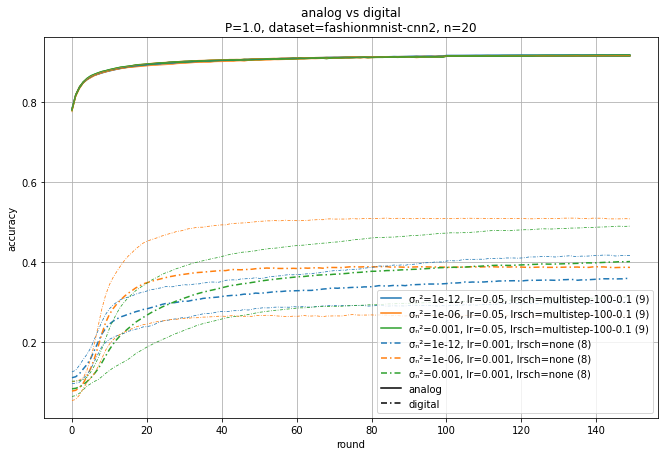

In [3]:
paths = ["results/20210822-fmnist-dynamic-2"]
show_timestamp_info(paths)
plot_analog_vs_digital(paths, extra_lines=['confints'], both_legends=True)

## At noise levels $\sigma_\mathrm{n}^2 = 10^{-6}, 10^{-1}$

Also $10^{-8}$, but decided to ditch that idea, so this plot should ignore 1 analog run and 1 digital run (relating to $\sigma_\mathrm{n}^2 = 10^{-8}$).

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 16:14:12** | 22 Aug 2021, 16:43:45 | 29 min 32 s |
| last to finish | 22 Aug 2021, 21:59:30 | **22 Aug 2021, 22:39:44** | 40 min 13 s |
| shortest | 22 Aug 2021, 16:43:45 | 22 Aug 2021, 17:13:11 | **29 min 26 s** |
| longest | 22 Aug 2021, 21:59:30 | 22 Aug 2021, 22:39:44 | **40 min 13 s** |


- Skipping 1 runs that don't match on 1 keys: noise (1)
- Skipping 1 runs that don't match on 1 keys: noise (1)


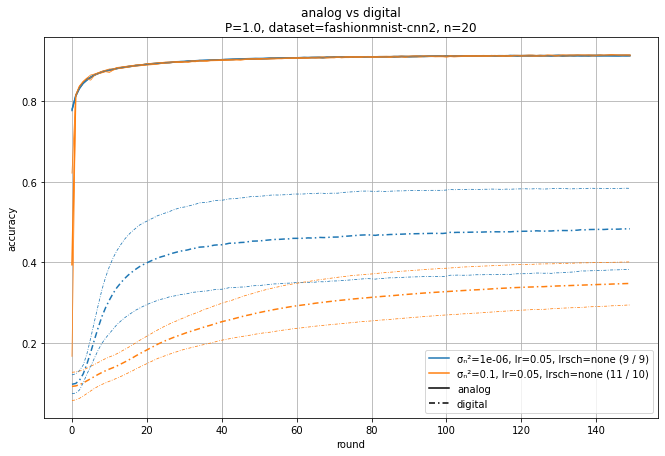

In [4]:
paths = ["results/20210822-fmnist-dynamic-3"]
show_timestamp_info(paths)
plot_analog_vs_digital(paths, noise=[1e-6, 1e-1], extra_lines=['confints'])

## Different learning rates for digital

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 16:14:12** | 22 Aug 2021, 16:43:45 | 29 min 32 s |
| last to finish | 23 Aug 2021, 01:35:20 | **23 Aug 2021, 02:00:21** | 25 min 00 s |
| shortest | 23 Aug 2021, 01:35:20 | 23 Aug 2021, 02:00:21 | **25 min 00 s** |
| longest | 22 Aug 2021, 21:59:30 | 22 Aug 2021, 22:39:44 | **40 min 13 s** |


- Skipping 21 runs using 1 other scripts: dynpower.py (21)
- Skipping 16 runs that don't match on 1 keys: noise (16)


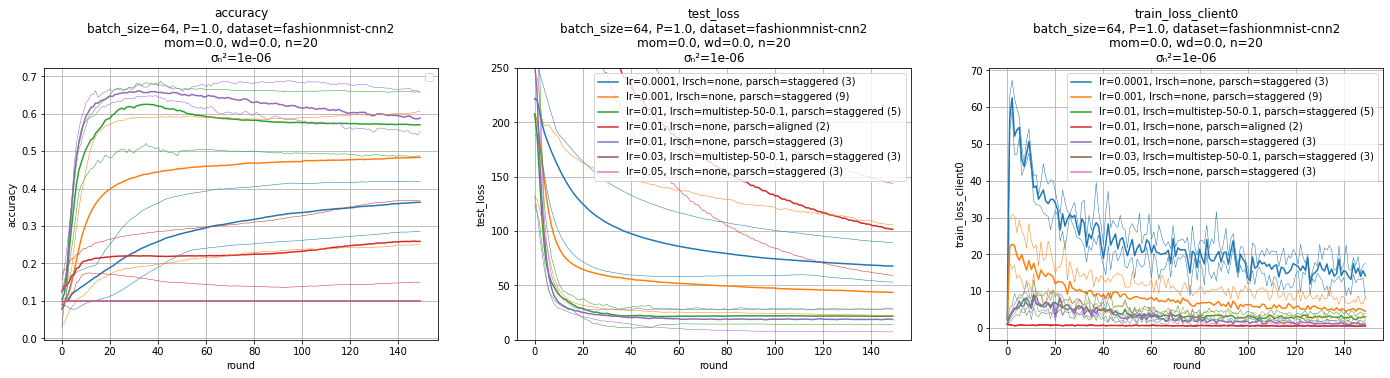

In [5]:
specs = {
    'script': 'dynquant.py',
    'rounds':                 ('expect', 150),
    'batch_size':             ('title',  64),
    'epochs':                 ('expect', 1),
    'ema_coefficient':        ('expect', 1 / 3),
    'data_per_client':        ('expect', None),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'power':                  ('title',  1.0),
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'lr_client':              ('series', '__all__'),
    'momentum_client':        ('title',  0.0),
    'weight_decay_client':    ('title',  0.0),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('title',  20),
    'noise':                  ('title',  1e-6),
    'lr_scheduler_client':    ('series', '__all__'),
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('expect', 0.9),
    'qrange_client_quantile': ('expect', 0.9),
    'channel_uses':           ('expect', None),
    'rounding_method':        ('expect', 'stochastic'),
    'parameter_schedule':     ('series', '__all__'),
    'zero_bits_strategy':     ('expect', 'read-zero'),
}

paths = ["results/20210822-fmnist-dynamic-3", "results/20210822-fmnist-digital-trials/"]
show_timestamp_info(paths)

axs = make_axes(3)
plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], specs, extra_lines=['range'], axs=axs)
axs[1].set_ylim(0, 250)
axs[0].legend([]) # it's the same as the other axes but it gets in the way of this plot

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 16:14:12** | 22 Aug 2021, 16:43:45 | 29 min 32 s |
| last to finish | 23 Aug 2021, 01:35:20 | **23 Aug 2021, 02:00:21** | 25 min 00 s |
| shortest | 23 Aug 2021, 01:35:20 | 23 Aug 2021, 02:00:21 | **25 min 00 s** |
| longest | 22 Aug 2021, 21:59:30 | 22 Aug 2021, 22:39:44 | **40 min 13 s** |


- Skipping 21 runs using 1 other scripts: dynpower.py (21)
- Skipping 29 runs that don't match on 1 keys: noise (29)


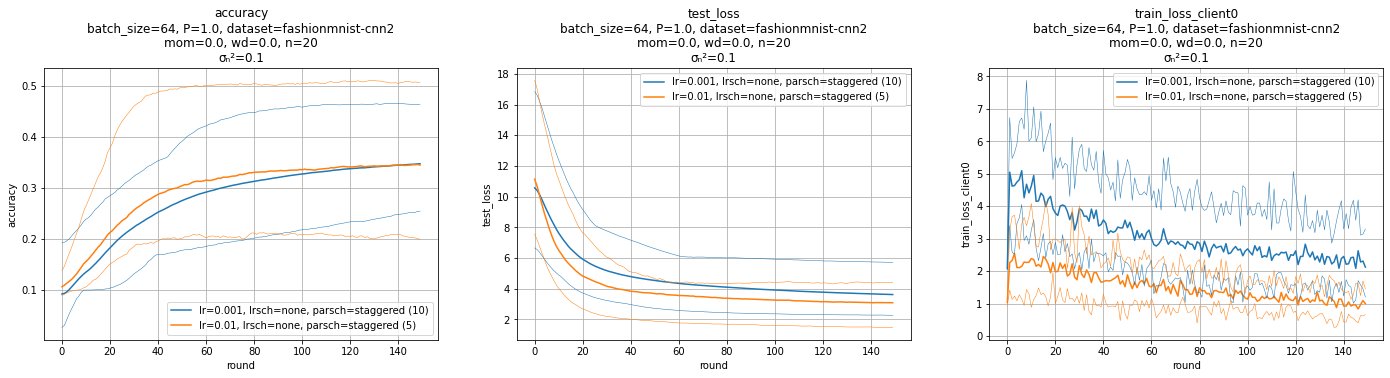

In [6]:
specs.update({
    'noise':                  ('title',  0.1),
})

paths = ["results/20210822-fmnist-dynamic-3", "results/20210822-fmnist-digital-trials/"]
show_timestamp_info(paths)

plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], specs, extra_lines=['range'])

# CIFAR-10

In [7]:
paths = ["results/20210822-cifar-dynamic-2/"]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 09:23:51** | 22 Aug 2021, 11:03:21 | 1 h 39 min 30 s |
| last to finish | 22 Aug 2021, 14:24:05 | **22 Aug 2021, 16:04:20** | 1 h 40 min 15 s |
| shortest | 22 Aug 2021, 14:10:51 | 22 Aug 2021, 15:46:06 | **1 h 35 min 14 s** |
| longest | 22 Aug 2021, 09:23:51 | 22 Aug 2021, 11:04:24 | **1 h 40 min 33 s** |


In [8]:
def get_comparison_specs(noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('title',  128),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title',  1.0),
        'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
        'lr_client':              ('title',  0.1),
        'momentum_client':        ('title',  0.9),
        'weight_decay_client':    ('title',  1e-4),
        'optimizer_client':       ('expect', 'sgd'),
        'clients':                ('title',  20),
        'noise':                  ('series', noise),
        'lr_scheduler_client':    ('expect', 'none'),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

Digital doesn't even get off the ground. Also, that LR change at the 100th round might be counterproductive here.

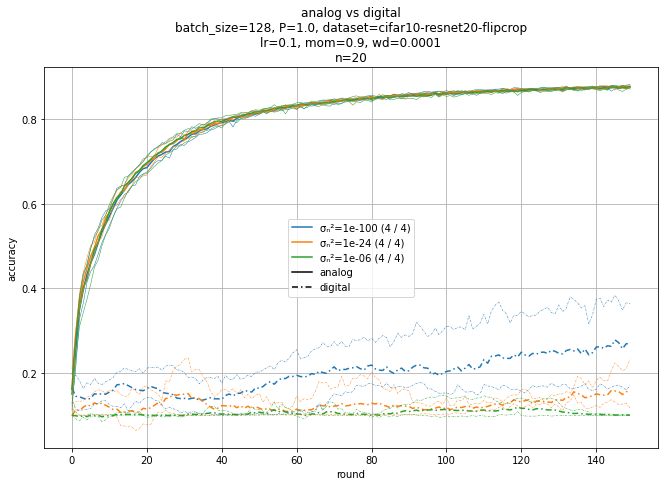

In [9]:
plot_analog_vs_digital(paths, noise=[1e-100, 1e-24, 1e-6], extra_lines=['range'])

## Different learning rates for digital scheme

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **22 Aug 2021, 17:00:49** | 22 Aug 2021, 18:03:52 | 1 h 03 min 02 s |
| last to finish | 23 Aug 2021, 01:36:33 | **23 Aug 2021, 02:43:59** | 1 h 07 min 26 s |
| shortest | 22 Aug 2021, 23:37:18 | 23 Aug 2021, 00:36:38 | **59 min 20 s** |
| longest | 23 Aug 2021, 01:36:33 | 23 Aug 2021, 02:43:59 | **1 h 07 min 26 s** |


- Skipping 6 runs using 1 other scripts: dynpower.py (6)


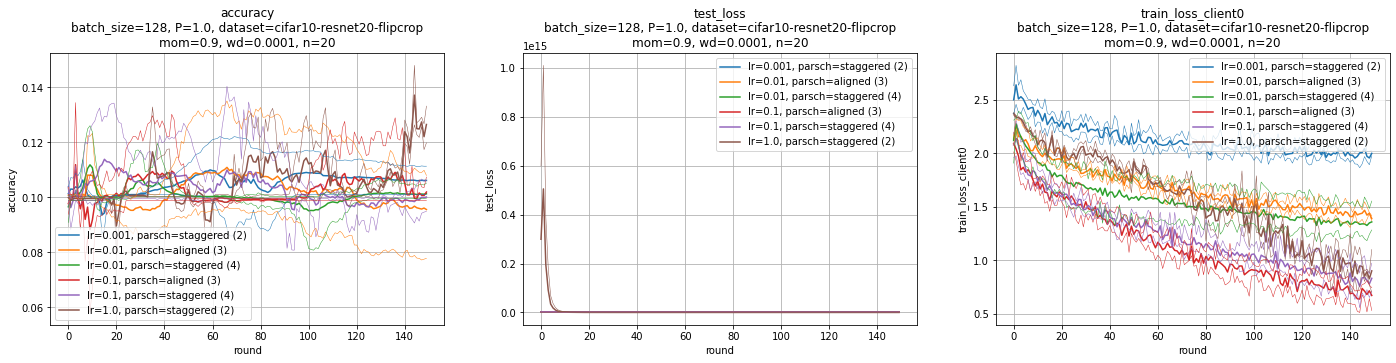

In [10]:
specs = {
    'script': 'dynquant.py',
    'rounds':                 ('expect', 150),
    'batch_size':             ('title',  128),
    'epochs':                 ('expect', 1),
    'ema_coefficient':        ('expect', 1 / 3),
    'data_per_client':        ('expect', None),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'power':                  ('title',  1.0),
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('series', '__all__'),
    'momentum_client':        ('title',  0.9),
    'weight_decay_client':    ('title',  1e-4),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('title',  20),
    'noise':                  ('expect', 1e-6),
    'lr_scheduler_client':    ('expect', 'none'),
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('expect', 0.9),
    'qrange_client_quantile': ('expect', 0.9),
    'channel_uses':           ('expect', None),
    'rounding_method':        ('expect', 'stochastic'),
    'parameter_schedule':     ('series', '__all__'),
    'zero_bits_strategy':     ('expect', 'read-zero'),
}

paths = ["results/20210822-cifar-dynamic-3/"]
show_timestamp_info(paths)

plot_averaged_training_charts(paths, ['accuracy', 'test_loss', 'train_loss_client0'], specs, extra_lines=['range'])

These are all broadly useless. The problem probably isn't hyperparameter tuning.